In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
from numpy import *
from IPython.display import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Creates list of frequencies corresponding to each flux density measurement
freq = []
for i in range(0,1024):
    current_freq = 1416.000+0.009766*i
    freq.append(current_freq)

In [3]:
#Grabs all the azimuth data files and sorts them in the following order: -1 to -9,0,10,1 to 9.
data_folder = 'sun_azimuth/'

az_files = glob.glob(data_folder + "sun*") 
az_files.sort() 
print(az_files)

offsets = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]

['sun_azimuth/sun-1_0.dat', 'sun_azimuth/sun-2_0.dat', 'sun_azimuth/sun-3_0.dat', 'sun_azimuth/sun-4_0.dat', 'sun_azimuth/sun-5_0.dat', 'sun_azimuth/sun-6_0.dat', 'sun_azimuth/sun-7_0.dat', 'sun_azimuth/sun-8_0.dat', 'sun_azimuth/sun-9_0.dat', 'sun_azimuth/sun0_0.dat', 'sun_azimuth/sun10_0.dat', 'sun_azimuth/sun1_0.dat', 'sun_azimuth/sun2_0.dat', 'sun_azimuth/sun3_0.dat', 'sun_azimuth/sun4_0.dat', 'sun_azimuth/sun5_0.dat', 'sun_azimuth/sun6_0.dat', 'sun_azimuth/sun7_0.dat', 'sun_azimuth/sun8_0.dat', 'sun_azimuth/sun9_0.dat']


In [4]:
#This block of code serves to go through each data file and extract the information we want which is the spectral data.
#In each file, every fourth row is a spectrum.  Each file is accessed and every fourth row is taken and added together to 
#produce a total spectrum. Each final spectrum is added to a list of azimuth spectra.

az_spectra = [] 

for az_file in az_files: 
    
    with open(az_file) as az_data: 
        
        spectrum_rows = []    
        
        for j, row in enumerate(az_data, start=1): 
            if j%4 == 0: 
                spectrum_rows.append(row) 
                
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val) 
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) 
            
        az_spectra.append(tot_spectrum)


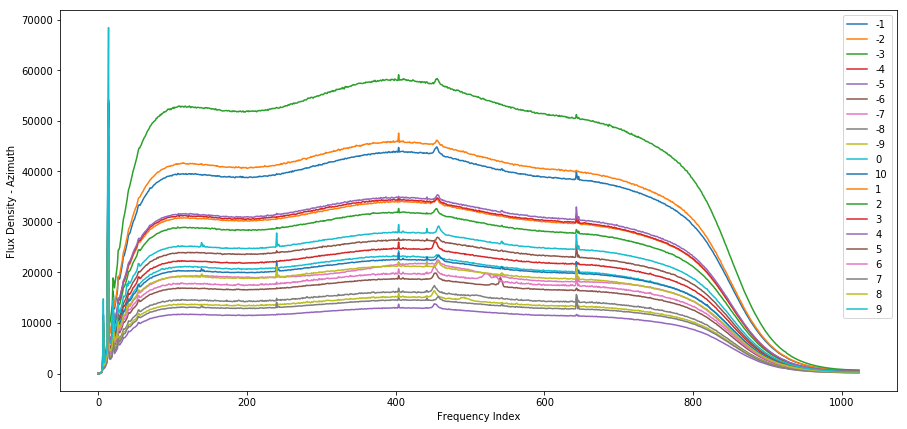

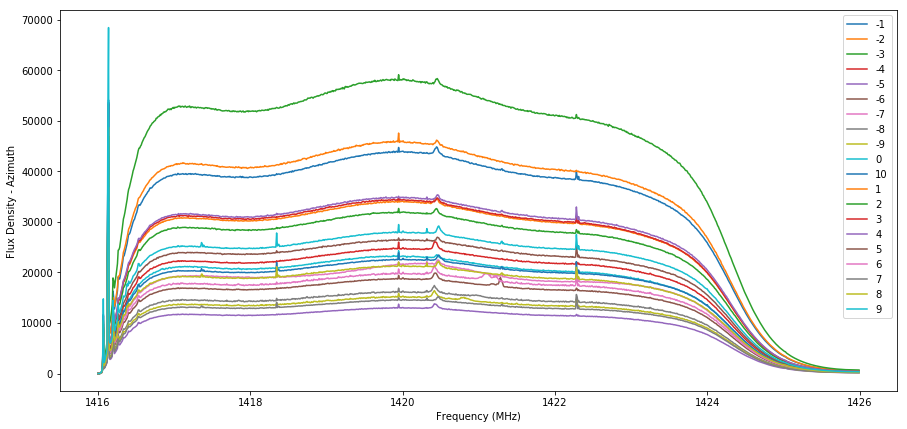

start frequency =  1416.78128
end frequency =  1422.8362


In [5]:
#Each azimuth spectrum is plotted on one figure, showing the total flux per frequency for each spectrum.
#The flux for each spectrum is plotted both against frequency and frequency index.  We used the frequency index
#to determine what range of frequencies to select for our analysis of the data. 

plt.figure(figsize=(15,7))

for i in range(0,20):
    plt.plot(az_spectra[i],label=offsets[i])

plt.xlabel('Frequency Index')
plt.ylabel('Flux Density - Azimuth')
legend = plt.legend()
plt.show()

plt.figure(figsize=(15,7))

for i in range(0,20):
    plt.plot(freq,az_spectra[i],label=offsets[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux Density - Azimuth')
plt.legend()
plt.show()

#We select the 80-700 frequency idex range because it looks to be the region that is mostly uniform and excludes the most noise on the edges.  

#This simply tells us the frequencies corresponding to the beginning and end of the range
print('start frequency = ',freq[80])
print('end frequency = ',freq[700])

In [6]:
#The total flux per frequency is plotted against frequency for the selected region.

az_spectra_new = []
for i in range(0,20):
    current_row = az_spectra[i]
    current_row = current_row[80:700]
    az_spectra_new.append(current_row)
    


plt.figure(figsize=(15,7))

new_freq = freq[80:700]

for i in range(0,20):
    plt.plot(new_freq,az_spectra_new[i],label=offsets[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux Density - Azimuth')
plt.legend()
plt.show()

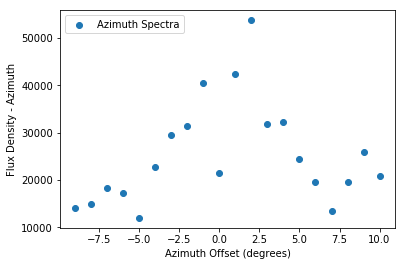

In [7]:
#Each spectrum is averaged in the selected region and plotted against the coresponding azimuth offset

az_spectra_new_avg = []

for i in range(0,20):
    az_spectra_new_avg.append(az_spectra_new[i].mean())
    
offsets = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,10,1,2,3,4,5,6,7,8,9]
plt.scatter(offsets,az_spectra_new_avg)
plt.xlabel('Azimuth Offset (degrees)')
plt.ylabel('Flux Density - Azimuth')
plt.legend(['Azimuth Spectra'],loc=2)
plt.show()

sigma=6.37638080397, u=1.24343186828, r=570025.262882
FWHM = 15.0152293319


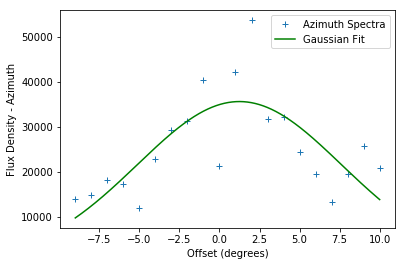

In [8]:
#A Gaussian curve is fitted to the data in order to eventually determine the FWHM of the Gaussian and therefore the beam width.

def Gaussian (x,sigma,u,r):
    p = (r/(sigma*(2*np.pi)**(1/2)))*np.exp(-0.5*((x-u)/sigma)**2)
    return p 

offsets_for_fit= np.linspace(-9,10,1000)

sigma_t,u_t,r_t = (7,0,3000)

coeffs, fiterr = curve_fit(Gaussian, offsets, az_spectra_new_avg, p0=(sigma_t,u_t,r_t),maxfev=10000)
print ("sigma=%s, u=%s, r=%s" % (coeffs[0], coeffs[1], coeffs[2]))
plt.plot(offsets,az_spectra_new_avg, '+', label='Azimuth Spectra')
plt.plot(offsets_for_fit,Gaussian(offsets_for_fit,*coeffs),'g',label='Gaussian Fit')

plt.xlabel('Offset (degrees)')
plt.ylabel('Flux Density - Azimuth')
plt.legend()

FWHM = 2*coeffs[0]*((2*np.log(2))**(1/2)) #width of beam of telescope
print('FWHM =',FWHM)

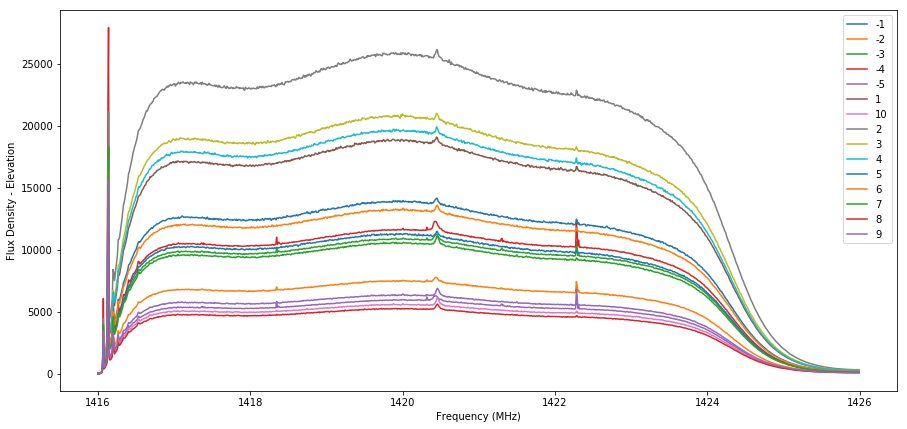

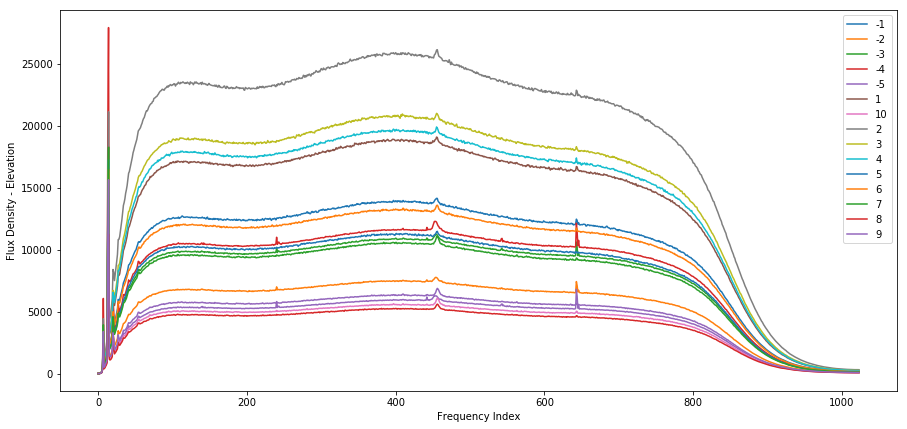

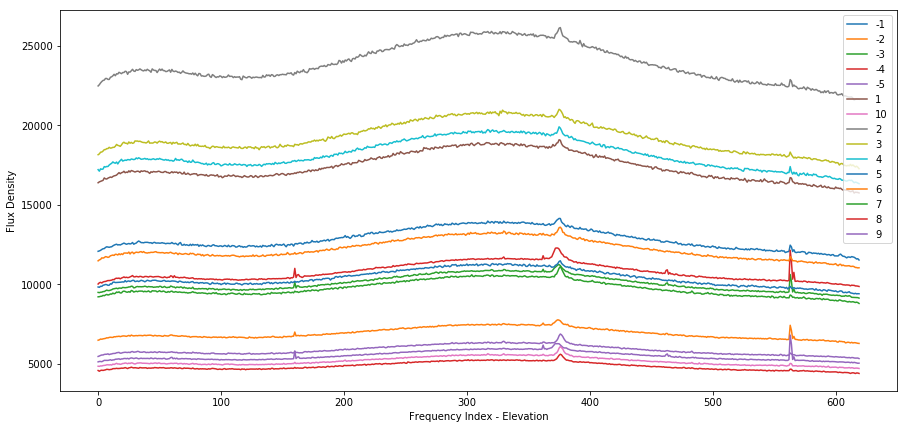

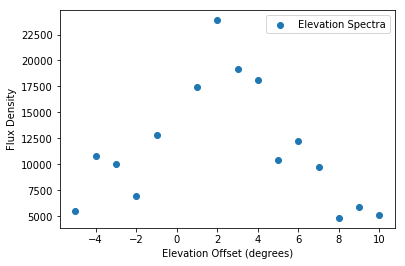

In [9]:
#The exact procedues above are repeated for the elevation data
#the same frequency range was chosen and the new offset order is applied by creating a new offsets2 list before plotting

data_folder2 = 'sun_elevation/'

el_files = glob.glob(data_folder2 + "sun*") 
el_files.sort() 


el_spectra = [] 

for el_file in el_files: 
    
    with open(el_file) as el_data: 
        
        spectrum_rows = []    
        
        for j, row in enumerate(el_data, start=1): 
            if j%4 == 0: 
                spectrum_rows.append(row) 
                
        tot_spectrum = np.zeros(1024) 
        for row in spectrum_rows: 
            temp_spec = row.split(' ') 
            spec = [] 
            for val in temp_spec: 
                if val != '' and val != '\n': 
                    spec.append(val) 
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) 
            
        el_spectra.append(tot_spectrum)

offsets2 = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]


plt.figure(figsize=(15,7))
for i in range(0,15):
    plt.plot(freq,el_spectra[i],label=offsets2[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux Density - Elevation')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
for i in range(0,15):
    plt.plot(el_spectra[i],label=offsets2[i])

plt.xlabel('Frequency Index')
plt.ylabel('Flux Density - Elevation')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))
el_spectra_new = []
for i in range(0,15):
    current_row2 = el_spectra[i]
    current_row2 = current_row2[80:700]
    el_spectra_new.append(current_row2)
    
for i in range(0,15):
    plt.plot(el_spectra_new[i],label=offsets2[i])

plt.xlabel('Frequency Index - Elevation')
plt.ylabel('Flux Density')
plt.legend()
plt.show()

plt.figure(figsize=(15,7))

el_spectra_new_avg = []

for i in range(0,15):
    plt.plot(new_freq,el_spectra_new[i],label=offsets2[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux Density - Elevation')
plt.legend()
plt.show()

for i in range(0,15):
    el_spectra_new_avg.append(el_spectra_new[i].mean())
    
plt.scatter(offsets2,el_spectra_new_avg,label='Elevation Spectra')
plt.xlabel('Elevation Offset (degrees)')
plt.ylabel('Flux Density')
plt.legend()
plt.show()


In [10]:
#A Gaussian curve is fitted to the elevation data, just like for the azimuth data.

offsets_for_fit2= np.linspace(-5,10,1000)

sigma2_t,u2_t,r2_t = (7,0,3000)

coeffs2, fiterr = curve_fit(Gaussian, offsets2, el_spectra_new_avg, p0=(sigma2_t,u2_t,r2_t),maxfev=10000)
print ("sigma2=%s, u2=%s , r2=%s" % (coeffs2[0], coeffs2[1], coeffs2[2]))
plt.plot(offsets2,el_spectra_new_avg, '+', label='Elevation Spectra')
plt.plot(offsets_for_fit2,Gaussian(offsets_for_fit2,*coeffs2),'g',label='Gaussian Fit')

plt.xlabel('Offset (degrees)')
plt.ylabel('Flux Density - Elevation')
plt.legend()

FWHM = 2*coeffs2[0]*((2*np.log(2))**(1/2))
print('FWHM =',FWHM)

sigma2=4.17332962913, u2=2.02500418046 , r2=198754.633562
FWHM = 9.82744026519


In [11]:
#central wavelength of the total fequency range observed is calculated.  
c = 3*10**8 #m/s
l = c/((1416+1426)/2)/10**6
l = l*100
print('wavelength = ',l, 'cm')


#both our FWHM are pretty far above the theoretical diffraction limitted angular resolution derived, meaning the telescope could be much better.

#we cannot resolve the sun because the diffraction limit is much larger than what we know to be about the angular
#size of the sun.  We need a larger diameter or need to operate at a lower wavelength.  Resolving the sun
#means having a beam size smaller than the angular diameter which we measured (FWHM) and found we do not have.  


wavelength =  21.111893033075297 cm
